#Mount Google Drive
---

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Recommedation System/Images

/content/gdrive/.shortcut-targets-by-id/1lqgbT0l_omT48auK7h6bfeemshG6m0LP/Recommedation System/Images


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [ ]:
import glob

counter = 0

for name in glob.glob("./*.png"):

  counter += 1

print(counter)

992


In [ ]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


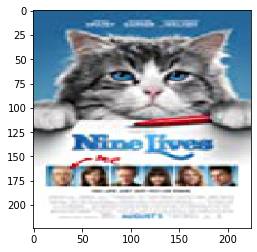

In [ ]:
img, x = load_image("4383594.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))


40960/35363 [==================================] - 0s 0us/step
predicted web_site with probability 0.714
predicted tabby with probability 0.030
predicted washer with probability 0.023
predicted monitor with probability 0.023
predicted screen with probability 0.018


In [ ]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

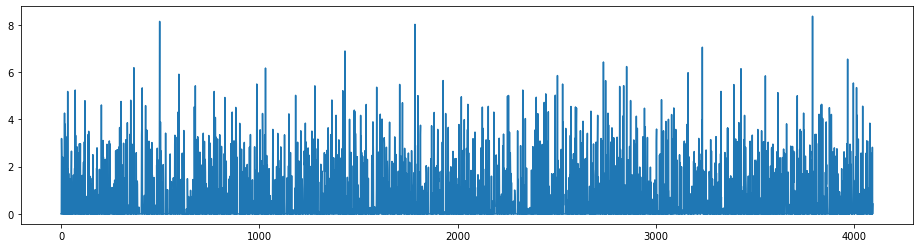

In [ ]:
img, x = load_image("4383594.png")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = './'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 995

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 992 images to analyze


In [ ]:
images[0][2:-4]

'2015381'

In [ ]:
import time
tic = time.clock()

features = []
feature_dict = {}

for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    feature_dict[image_path[2:-4]] = feat
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


analyzing image 0 / 992. Time: 0.0007 seconds.

analyzing image 500 / 992. Time: 7.1517 seconds.
finished extracting features for 992 images


In [ ]:
feature_dict["4383594"]

array([0.        , 0.        , 3.1903105 , ..., 2.8192594 , 0.        ,
       0.42256707], dtype=float32)

In [ ]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_features = pca.transform(features)

In [ ]:
list(feature_dict.keys()).index("2015381")

0

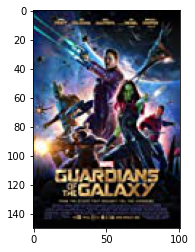

In [ ]:
import random
img = image.load_img("2015381.png")
plt.imshow(img)

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[0], feat) for feat in pca_features ]

In [ ]:
from scipy.spatial import distance


similarity_matrix = []
similarity_dict = {}

for movie in range(len(list(feature_dict.keys()))):
  
  similar_idx_movie = [1-distance.cosine(pca_features[movie], feat) for feat in pca_features ]
  similarity_matrix.append(similar_idx_movie)
  similarity_dict[movie] = similar_idx_movie

similarity_dict["IMDB_Moive_IDs_Sorted"] = list(feature_dict.keys())

In [ ]:
list(feature_dict.keys())[0]

'2015381'

In [ ]:
similarity_matrix_combined = np.array(similarity_matrix)

In [ ]:
norm_similarity_matrix = (similarity_matrix_combined-similarity_matrix_combined.min())/(similarity_matrix_combined.max() - similarity_matrix_combined.min())

In [ ]:
import pandas as pd

pd.DataFrame(sent_dict)

,2015381,1446714,4972582,3470600,1386697,2034800,3783958,4799064,1212428,1355644,3183660,4846340,3748528,3521164,4680182,2709768,2119532,4196776,3741834,2543164,1800302,4034228,3896738,1679335,1628841,2936884,2631186,3778010,4651520,2094766,4501244,4550098,3385516,1431045,2592614,3498820,816692,1211837,2404435,1700841,...,1924429,2625810,467200,1242432,4575930,460829,1659619,3488710,4227282,1210819,1572315,486822,1336608,1262416,4341582,3760922,2402101,4265508,4645368,1189073,4257926,1823664,445922,1924435,3369806,1240982,1622979,2318092,1029234,1020072,834001,986264,810922,1220634,1636826,1741273,498353,1023481,2758904,4383594
2015381,1.000000,0.278903,0.248301,0.388134,0.439046,0.245921,0.420519,0.273552,0.385939,0.161395,0.153614,0.160536,0.386892,0.321101,0.437513,0.130060,0.169612,0.248796,0.167886,0.194801,0.248834,0.172552,0.212537,0.222358,0.353101,0.288515,0.372291,0.156306,0.299975,0.286714,0.159962,0.194352,0.471117,0.176174,0.463284,0.398203,0.162354,0.378877,0.158417,0.174430,...,0.220237,0.138728,0.307070,0.175667,0.283426,0.192349,0.165747,0.325364,0.255244,0.271364,0.449223,0.270671,0.429832,0.382304,0.172401,0.237214,0.463724,0.215777,0.368616,0.105562,0.302221,0.299176,0.415496,0.298765,0.263515,0.412783,0.530265,0.133221,0.459305,0.272192,0.430663,0.115017,0.190405,0.386861,0.444381,0.353754,0.177818,0.346324,0.341855,0.172211
1446714,0.278903,1.000000,0.341925,0.261093,0.188453,0.397841,0.298455,0.233469,0.408867,0.189235,0.370385,0.154150,0.334167,0.263453,0.279866,0.238258,0.304340,0.292929,0.266219,0.270802,0.267626,0.225622,0.223106,0.290565,0.414243,0.242015,0.412498,0.308980,0.146344,0.361895,0.152320,0.248487,0.324392,0.344138,0.212580,0.267265,0.377962,0.348725,0.237298,0.227864,...,0.248425,0.326157,0.139825,0.332804,0.263546,0.275893,0.216928,0.326092,0.273849,0.189888,0.389427,0.311982,0.206901,0.295124,0.210749,0.205718,0.267578,0.196833,0.308998,0.167369,0.354394,0.182885,0.342432,0.187120,0.281658,0.205323,0.313651,0.320458,0.251806,0.227777,0.458583,0.167586,0.121933,0.246995,0.401654,0.246231,0.379462,0.276079,0.141831,0.273920
4972582,0.248301,0.341925,1.000000,0.201871,0.198294,0.498570,0.154703,0.160991,0.250360,0.467946,0.197004,0.389695,0.322158,0.201416,0.218466,0.242525,0.198963,0.261938,0.252397,0.339740,0.428572,0.396017,0.332547,0.312614,0.262758,0.248014,0.176612,0.367230,0.143277,0.469256,0.296208,0.501665,0.174147,0.430634,0.212484,0.236605,0.213798,0.232213,0.267118,0.422467,...,0.270316,0.433057,0.221503,0.474945,0.239632,0.331569,0.199968,0.362754,0.171141,0.217438,0.264463,0.304578,0.061857,0.311767,0.306225,0.269557,0.214299,0.280593,0.334891,0.396104,0.257764,0.211669,0.193221,0.235611,0.217743,0.221206,0.273186,0.339695,0.226716,0.303149,0.269552,0.335978,0.270635,0.261926,0.104447,0.245699,0.316490,0.144657,0.160366,0.387947
3470600,0.388134,0.261093,0.201871,1.000000,0.248812,0.160172,0.367007,0.364137,0.311105,0.196063,0.297920,0.209673,0.190417,0.199296,0.210890,0.325428,0.122068,0.208603,0.228067,0.207081,0.318863,0.211990,0.157034,0.332757,0.433033,0.376174,0.180251,0.120040,0.358807,0.211082,0.203397,0.397880,0.351454,0.212158,0.227293,0.240320,0.157750,0.280696,0.250970,0.223999,...,0.297864,0.177560,0.226533,0.167355,0.330867,0.314264,0.251382,0.266143,0.512477,0.195955,0.182484,0.215016,0.294215,0.309445,0.277241,0.333299,0.287527,0.277783,0.343610,0.231214,0.282310,0.282281,0.297555,0.296892,0.247078,0.162560,0.259346,0.207098,0.186774,0.275388,0.383844,0.330357,0.202000,0.310664,0.368187,0.328348,0.197254,0.277963,0.245702,0.225596
1386697,0.439046,0.188453,0.198294,0.248812,1.000000,0.139122,0.410531,0.271148,0.196887,0.188468,0.373048,0.207084,0.372097,0.518388,0.396761,0.265668,0.243679,0.159387,0.237563,0.174472,0.181752,0.220779,0.242408,0.289299,0.373216,0.331380,0.278278,0.206018,0.301433,0.116629,0.164571,0.222813,0.515272,0.234661,0.436954,0.338803,0.337938,0.411569,0.241321,0.218408,...,0.373966,0.181605,0.352311,0.145384,0.248301,0.163401,0.238822,0

In [ ]:
sent_dict = {}

for i, base_movie in enumerate(list(feature_dict.keys())):

  ghost_dict = {}
  for j, movie in enumerate(list(feature_dict.keys())):

    ghost_dict[movie] = norm_similarity_matrix[i][j]

  sent_dict[base_movie] = ghost_dict

In [ ]:
sent_dict["2015381"].values()

dict_values([0.0, 0.9931256123818457, 1.037310853600502, 0.8386188894510269, 0.780150294303894, 1.0402023158967495, 0.7955875098705292, 1.0030997055582702, 0.847221851348877, 1.1557523161172867, 1.1670026332139969, 1.161209911108017, 0.8461261540651321, 0.9376891814172268, 0.7740361839532852, 1.2016371190547943, 1.1469579488039017, 1.0394394174218178, 1.1493094265460968, 1.110449880361557, 1.0366149879992008, 1.145533248782158, 1.0881714150309563, 1.0735799074172974, 0.8910925760865211, 0.9833019655197859, 0.8716346621513367, 1.165001392364502, 0.965630866587162, 0.9820436667650938, 1.1635121554136276, 1.1223281770944595, 0.7281955480575562, 1.132976159453392, 0.7428017258644104, 0.8285486996173859, 1.1588803678750992, 0.8485385477542877, 1.1625960022211075, 1.1407091319561005, 1.1983475089073181, 0.9714741390198469, 0.8870169967412949, 0.9479183852672577, 1.0462669804692268, 1.1744800359010696, 0.9574148245155811, 1.2111806273460388, 0.7411143481731415, 0.9878958156332374, 1.150459095

In [ ]:
import json as js

with open('/content/gdrive/MyDrive/Recommedation System/Similarity_Martix_Images.json', 'w') as fp:
        js.dump(sent_dict, fp, indent=4)

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

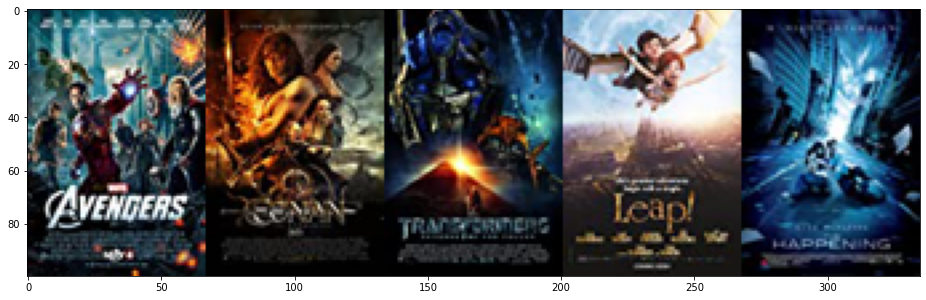

In [ ]:
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

plt.figure(figsize = (16,12))
plt.imshow(concat_image)
